In [75]:
# Setup

checkpoint_path = '/home/colab/autoencoder-vaegan-160/checkpoints-backup/checkpoint.ckpt'
img_directory = '/home/colab/datasets/160x128'
movie_out = '/home/colab/movie'
batch_size = 64

In [76]:
# imports

%matplotlib inline
import tensorflow as tf
import numpy as np
# import scipy as sp
# import os

from utils import imshow, pixels01, pixels11
from model import Model as M

In [77]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = M(img_directory, sess=sess, checkpoints_path=checkpoint_path, img_shape=(128, 160))
model.build_model()
model.build_losses()
model.build_optimizers()
model.setup_session()
model.setup_logging()

trying to restore session from /home/colab/autoencoder-vaegan-160/checkpoints-backup/checkpoint.ckpt
INFO:tensorflow:Restoring parameters from /home/colab/autoencoder-vaegan-160/checkpoints-backup/checkpoint.ckpt
restored session


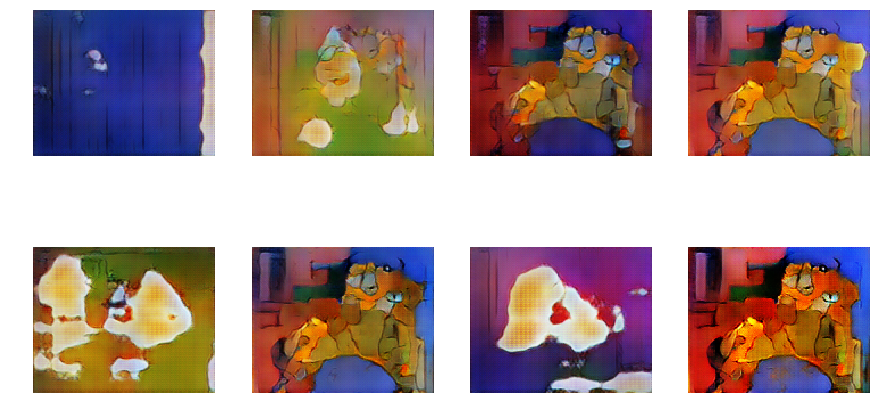

In [53]:
zdraw = np.random.normal(scale=1.0, size=(batch_size, 128)).astype('float32')
imgs = pixels01(model.Gz.eval({ model.Z: zdraw, model.is_training: False }))
imshow(imgs[:8])

In [5]:
# new = np.tile(zdraw[3] + scene, [64,1])
# imgs = pixels01(model.Gz.eval({ model.Z: new, model.is_training: False }))
# imshow(imgs[:8])

In [78]:
# build a generator that uses only the mean from the encoder, rather than picking a random number
# from mean / sigma of encoder. This helps make smooth movies.
Gmean = model.arch.generator(model.E_means, reuse=True)

In [79]:
idx = 1

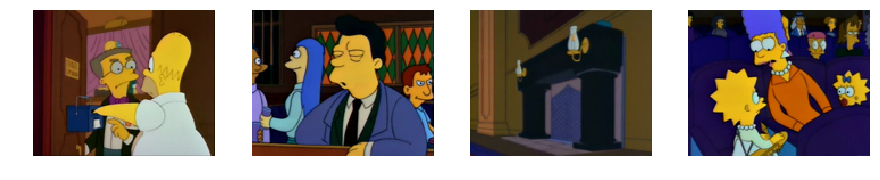

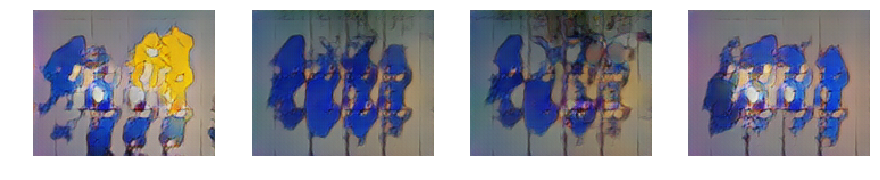

In [84]:
x = model.feed.feed(int(idx//64))
imgs = pixels01(Gmean.eval({ model.X: pixels11(x), model.is_training: False }))
i = idx % 64
imshow(x[i:i+4])
imshow(imgs[i:i+4])
idx += 4

In [86]:
from PIL import Image
import os

from feed import Feed

batches = 500
out_idx = 0
model.feed = Feed(img_directory, batch_size, shuffle=False)
for b in range(batches):
    x = model.feed.feed(b)
    imgs = pixels01(Gmean.eval({ model.X: pixels11(x), model.is_training: False }))
    as_ints = (imgs * 255.0).astype('uint8')
    paths = [os.path.join(movie_out, ('%06d.jpg' % i)) for i in range(out_idx, out_idx+batch_size)]
    for im, p in zip(as_ints, paths):
        Image.fromarray(im).save(p)
    out_idx += batch_size   